**Informações sobre o conjunto de dados FIFA 19**

Este conjunto de dados possui várias características diferentes para mais de 18.000 jogadores. As características incluem: nome do jogador, clube associado, idade, peso, classificação geral, classificação potencial etc., além de várias características específicas do jogador relacionadas a salário, valor de mercado, habilidade, posição de jogo, movimento, poder e mentalidade.

**Etapas Realizadas na Análise Exploratória**

- Importação das bibliotecas
- Carregando o dataset
- Data Cleaning
- Excluindo colunas redundantes
- Limpeza individual em algumas colunas
- Visualização de Dados: Obter correlação entre diferentes variáveis
- Verificação das features de alguns clubes
- Jogadores de diferentes Nacionalidades 
- Pontuações gerais dos jogadores
- Distribuição da Pontuação Geral em Diferentes Clubes populares

In [31]:
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
import numpy as np
import re
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
# Carregando o dataset
df = pd.read_csv('data_fifa.csv')

In [33]:
# Checando as primeiras linhas do dataset
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [58]:
# Checando os clubes presentes no conjunto de dados
for index, row in df.iterrows():
    print(index, row['Club'])

<h2>Data Cleaning</h2>

In [35]:
# Checando as variáveis
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [36]:
# Selecionando as features interessantes para a análise exploratória
select_columns = [
    'Name',
    'Age',
    'Nationality',
    'Overall',
    'Potential',
    'Special',
    'Acceleration',
    'Aggression',
    'Agility',
    'Balance',
    'BallControl',
    'Body Type',
    'Composure',
    'Crossing',
    'Wage',
    'Curve',
    'Club',
    'Dribbling',
    'FKAccuracy',
    'Finishing',
    'GKDiving', 'GKHandling',
    'GKKicking',
    'GKPositioning',
    'GKReflexes',
    'HeadingAccuracy',
    'Interceptions',
    'International Reputation',
    'Jersey Number',
    'Jumping',
    'Joined',
    'LongPassing',
    'LongShots',
    'Marking',
    'Penalties',
    'Position',
    'Positioning',
    'Preferred Foot',
    'Reactions',
    'ShortPassing',
    'ShotPower',
    'Skill Moves',
    'SlidingTackle',
    'SprintSpeed',
    'Stamina',
    'StandingTackle',
    'Strength',
    'Value',
    'Vision',
    'Volleys',
    'Wage',
    'Weak Foot',
    'Work Rate'
]
    

In [37]:
# Criando um novo dataframe
dados_fifa = df[select_columns]
dados_fifa.head()

,Name,Age,Nationality,Overall,Potential,Special,Acceleration,Aggression,Agility,Balance,BallControl,Body Type,Composure,Crossing,Wage,Curve,Club,Dribbling,FKAccuracy,Finishing,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,HeadingAccuracy,Interceptions,International Reputation,Jersey Number,Jumping,Joined,LongPassing,LongShots,Marking,Penalties,Position,Positioning,Preferred Foot,Reactions,ShortPassing,ShotPower,Skill Moves,SlidingTackle,SprintSpeed,Stamina,StandingTackle,Strength,Value,Vision,Volleys,Wage,Weak Foot,Work Rate
0,L. Messi,31,Argentina,94,94,2202,91.0,48.0,91.0,95.0,96.0,Messi,96.0,84.0,€565K,93.0,FC Barcelona,97.0,94.0,95.0,6.0,11.0,15.0,14.0,8.0,70.0,22.0,5.0,10.0,68.0,"Jul 1, 2004",87.0,94.0,33.0,75.0,RF,94.0,Left,95.0,90.0,85.0,4.0,26.0,86.0,72.0,28.0,59.0,€110.5M,94.0,86.0,€565K,4.0,Medium/ Medium
1,Cristiano Ronaldo,33,Portugal,94,94,2228,89.0,63.0,87.0,70.0,94.0,C. Ronaldo,95.0,84.0,€405K,81.0,Juventus,88.0,76.0,94.0,7.0,11.0,15.0,14.0,11.0,89.0,29.0,5.0,7.0,95.0,"Jul 10, 2018",77.0,93.0,28.0,85.0,ST,95.0,Right,96.0,81.0,95.0,5.0,23.0,91.0,88.0,31.0,79.0,€77M,82.0,87.0,€405K,4.0,High/ Low
2,Neymar Jr,26,Brazil,92,93,2143,94.0,56.0,96.0,84.0,95.0,Neymar,94.0,79.0,€290K,88.0,Paris Saint-Germain,96.0,87.0,87.0,9.0,9.0,15.0,15.0,11.0,62.0,36.0,5.0,10.0,61.0,"Aug 3, 2017",78.0,82.0,27.0,81.0,LW,89.0,Right,94.0,84.0,80.0,5.0,33.0,90.0,81.0,24.0,49.0,€118.5M,87.0,84.0,€290K,5.0,High/ Medium
3,De Gea,27,Spain,91,93,1471,57.0,38.0,60.0,43.0,42.0,Lean,68.0,17.0,€260K,21.0,Manchester United,18.0,19.0,13.0,90.0,85.0,87.0,88.0,94.0,21.0,30.0,4.0,1.0,67.0,"Jul 1, 2011",51.0,12.0,15.0,40.0,GK,12.0,Right,90.0,50.0,31.0,1.0,13.0,58.0,43.0,21.0,64.0,€72M,68.0,13.0,€260K,3.0,Medium/ Medium
4,K. De Bruyne,27,Belgium,91,92,2281,78.0,76.0,79.0,77.0,91.0,Normal,88.0,93.0,€355K,85.0,Manchester City,86.0,83.0,82.0,15.0,13.0,5.0,10.0,13.0,55.0,61.0,4.0,7.0,63.0,"Aug 30, 2015",91.0,91.0,68.0,79.0,RCM,87.0,Right,91.0,92.0,91.0,4.0,51.0,76.0,90.0,58.0,75.0,€102M,94.0,82.0,€355K,5.0,High/ High


In [38]:
# Checando onde há valores NaN
dados_fifa.isnull().any()

Name                        False
Age                         False
Nationality                 False
Overall                     False
Potential                   False
Special                     False
Acceleration                 True
Aggression                   True
Agility                      True
Balance                      True
BallControl                  True
Body Type                    True
Composure                    True
Crossing                     True
Wage                        False
Curve                        True
Club                         True
Dribbling                    True
FKAccuracy                   True
Finishing                    True
GKDiving                     True
GKHandling                   True
GKKicking                    True
GKPositioning                True
GKReflexes                   True
HeadingAccuracy              True
Interceptions                True
International Reputation     True
Jersey Number                True
Jumping       

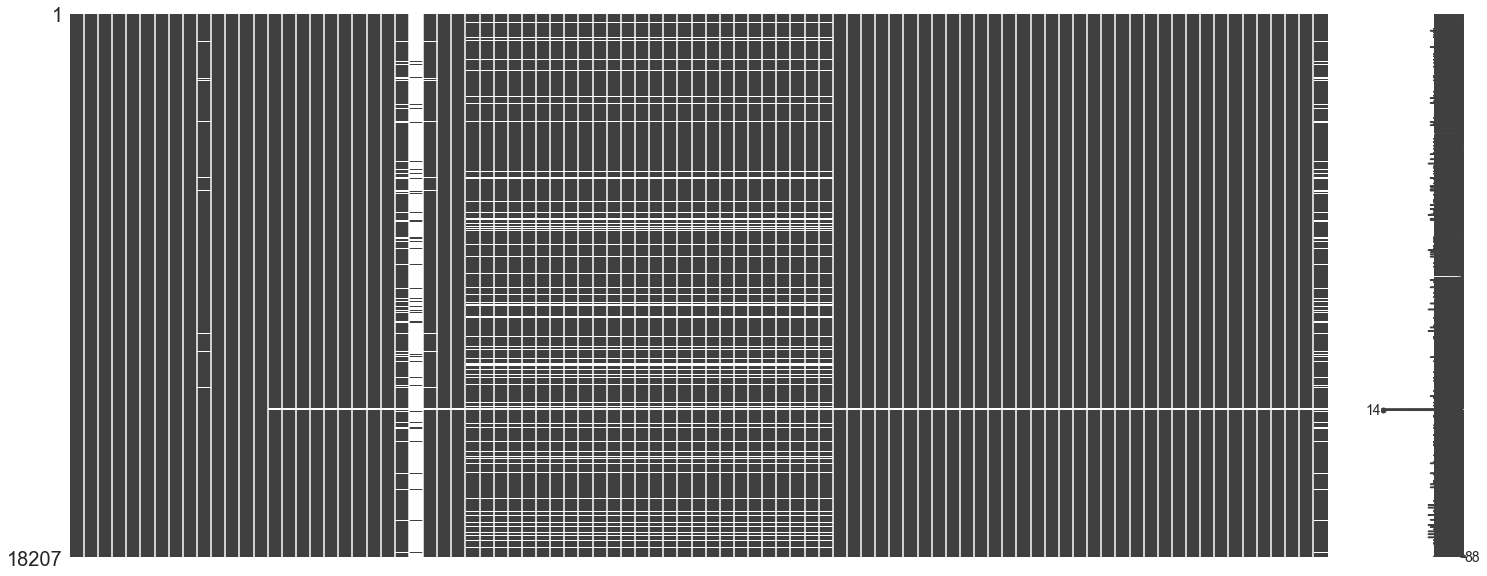

In [39]:
# Para esta sessão iremos usar a biblioteca missingno para visualizar os valores ausentes
import missingno as msno
msno.matrix(df)
plt.show()

In [40]:
# Verificando se existe valores faltando no dataset
dados_fifa.isnull().sum()

Name                           0
Age                            0
Nationality                    0
Overall                        0
Potential                      0
Special                        0
Acceleration                  48
Aggression                    48
Agility                       48
Balance                       48
BallControl                   48
Body Type                     48
Composure                     48
Crossing                      48
Wage                           0
Curve                         48
Club                         241
Dribbling                     48
FKAccuracy                    48
Finishing                     48
GKDiving                      48
GKHandling                    48
GKKicking                     48
GKPositioning                 48
GKReflexes                    48
HeadingAccuracy               48
Interceptions                 48
International Reputation      48
Jersey Number                 60
Jumping                       48
Joined    

In [41]:
dados_fifa.isnull().sum()

Name                           0
Age                            0
Nationality                    0
Overall                        0
Potential                      0
Special                        0
Acceleration                  48
Aggression                    48
Agility                       48
Balance                       48
BallControl                   48
Body Type                     48
Composure                     48
Crossing                      48
Wage                           0
Curve                         48
Club                         241
Dribbling                     48
FKAccuracy                    48
Finishing                     48
GKDiving                      48
GKHandling                    48
GKKicking                     48
GKPositioning                 48
GKReflexes                    48
HeadingAccuracy               48
Interceptions                 48
International Reputation      48
Jersey Number                 60
Jumping                       48
Joined    

<h2>Exploratory Data Analysis</h2>

In [42]:
# Analisando as features do clube Manchester United
def club(x):
    return dados_fifa[dados_fifa['Club'] == x][['Name','Position','Overall','Nationality','Age',]]

club('Manchester United').head(15)

,Name,Position,Overall,Nationality,Age
3,De Gea,GK,91,Spain,27
45,P. Pogba,RDM,87,France,25
47,R. Lukaku,ST,87,Belgium,25
93,A. Sánchez,RW,85,Chile,29
116,A. Martial,LW,84,France,22
132,N. Matić,CDM,84,Serbia,29
211,Juan Mata,RM,83,Spain,30
250,Fred,CM,82,Brazil,25
254,J. Lingard,CAM,82,England,25
319,M. Rashford,LW,81,England,20


In [43]:
# Verificando a idade e overall por nome dos jogadores, clube e nacionalidades
dados_fifa.sort_values(by = 'Age' , ascending = False)[['Name','Club','Nationality','Overall', 'Age' ]].head(15)

,Name,Club,Nationality,Overall,Age
4741,O. Pérez,Pachuca,Mexico,71,45
18183,K. Pilkington,Cambridge United,England,48,44
17726,T. Warner,Accrington Stanley,Trinidad & Tobago,53,44
10545,S. Narazaki,Nagoya Grampus,Japan,65,42
7225,C. Muñoz,CD Universidad de Concepción,Argentina,68,41
1120,J. Villar,NaN,Paraguay,77,41
12192,H. Sulaimani,Ohod Club,Saudi Arabia,63,41
15426,M. Tyler,Peterborough United,England,59,41
4228,B. Nivet,ESTAC Troyes,France,71,41
10356,F. Kippe,Lillestrøm SK,Norway,65,40


In [44]:
# Checando os nome dos jogadores que tem a nacionalidade brasileira
x=dados_fifa[dados_fifa['Nationality'] =='Brazil']
x['Name'].head(20).sort_values()

64         Alex Sandro
112        Alex Telles
81             Alisson
27            Casemiro
32            Coutinho
65       Douglas Costa
57             Ederson
118            Fabinho
75         Fernandinho
106        Filipe Luís
145              Jonas
35             Marcelo
119         Marquinhos
104            Miranda
102              Naldo
2            Neymar Jr
91            Paulinho
61     Roberto Firmino
39        Thiago Silva
140            Willian
Name: Name, dtype: object

In [45]:
# Verificando quais jogadores tem idade acima de 30 anos
dados_fifa.query('Age > 30').head(10)

,Name,Age,Nationality,Overall,Potential,Special,Acceleration,Aggression,Agility,Balance,BallControl,Body Type,Composure,Crossing,Wage,Curve,Club,Dribbling,FKAccuracy,Finishing,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,HeadingAccuracy,Interceptions,International Reputation,Jersey Number,Jumping,Joined,LongPassing,LongShots,Marking,Penalties,Position,Positioning,Preferred Foot,Reactions,ShortPassing,ShotPower,Skill Moves,SlidingTackle,SprintSpeed,Stamina,StandingTackle,Strength,Value,Vision,Volleys,Wage,Weak Foot,Work Rate
0,L. Messi,31,Argentina,94,94,2202,91.0,48.0,91.0,95.0,96.0,Messi,96.0,84.0,€565K,93.0,FC Barcelona,97.0,94.0,95.0,6.0,11.0,15.0,14.0,8.0,70.0,22.0,5.0,10.0,68.0,"Jul 1, 2004",87.0,94.0,33.0,75.0,RF,94.0,Left,95.0,90.0,85.0,4.0,26.0,86.0,72.0,28.0,59.0,€110.5M,94.0,86.0,€565K,4.0,Medium/ Medium
1,Cristiano Ronaldo,33,Portugal,94,94,2228,89.0,63.0,87.0,70.0,94.0,C. Ronaldo,95.0,84.0,€405K,81.0,Juventus,88.0,76.0,94.0,7.0,11.0,15.0,14.0,11.0,89.0,29.0,5.0,7.0,95.0,"Jul 10, 2018",77.0,93.0,28.0,85.0,ST,95.0,Right,96.0,81.0,95.0,5.0,23.0,91.0,88.0,31.0,79.0,€77M,82.0,87.0,€405K,4.0,High/ Low
6,L. Modrić,32,Croatia,91,91,2280,80.0,62.0,93.0,94.0,93.0,Lean,84.0,86.0,€420K,85.0,Real Madrid,90.0,78.0,72.0,13.0,9.0,7.0,14.0,9.0,55.0,83.0,4.0,10.0,68.0,"Aug 1, 2012",88.0,82.0,60.0,82.0,RCM,79.0,Right,90.0,93.0,79.0,4.0,73.0,72.0,89.0,76.0,58.0,€67M,92.0,76.0,€420K,4.0,High/ High
7,L. Suárez,31,Uruguay,91,91,2346,86.0,87.0,82.0,83.0,90.0,Normal,85.0,77.0,€455K,86.0,FC Barcelona,87.0,84.0,93.0,27.0,25.0,31.0,33.0,37.0,77.0,41.0,5.0,9.0,69.0,"Jul 11, 2014",64.0,85.0,62.0,85.0,RS,92.0,Right,92.0,82.0,86.0,3.0,38.0,75.0,90.0,45.0,83.0,€80M,84.0,88.0,€455K,4.0,High/ Medium
8,Sergio Ramos,32,Spain,91,91,2201,76.0,88.0,78.0,66.0,84.0,Normal,82.0,66.0,€380K,74.0,Real Madrid,63.0,72.0,60.0,11.0,8.0,9.0,7.0,11.0,91.0,90.0,4.0,15.0,93.0,"Aug 1, 2005",77.0,59.0,87.0,75.0,RCB,60.0,Right,85.0,78.0,79.0,3.0,91.0,75.0,84.0,92.0,83.0,€51M,63.0,66.0,€380K,3.0,High/ Medium
12,D. Godín,32,Uruguay,90,90,1946,68.0,89.0,58.0,54.0,76.0,Lean,82.0,55.0,€125K,49.0,Atlético Madrid,53.0,51.0,42.0,6.0,8.0,15.0,5.0,15.0,92.0,88.0,3.0,10.0,91.0,"Aug 4, 2010",70.0,43.0,90.0,50.0,CB,48.0,Right,85.0,79.0,67.0,2.0,89.0,68.0,66.0,89.0,88.0,€44M,52.0,47.0,€125K,3.0,Medium/ High
13,David Silva,32,Spain,90,90,2115,70.0,57.0,92.0,90.0,94.0,Normal,93.0,84.0,€285K,82.0,Manchester City,89.0,77.0,76.0,6.0,15.0,7.0,6.0,12.0,54.0,50.0,4.0,21.0,64.0,"Jul 14, 2010",87.0,75.0,59.0,75.0,LCM,89.0,Left,90.0,93.0,72.0,4.0,29.0,64.0,78.0,53.0,52.0,€60M,92.0,82.0,€285K,2.0,High/ Medium
21,E. Cavani,31,Uruguay,89,89,2161,75.0,84.0,77.0,59.0,82.0,Lean,82.0,70.0,€200K,77.0,Paris Saint-Germain,80.0,76.0,89.0,12.0,5.0,13.0,13.0,10.0,89.0,48.0,4.0,21.0,88.0,"Jul 16, 2013",52.0,79.0,52.0,85.0,LS,93.0,Right,91.0,78.0,87.0,3.0,39.0,76.0,92.0,45.0,78.0,€60M,77.0,90.0,€200K,4.0,High/ High
22,M. Neuer,32,Germany,89,89,1473,54.0,29.0,51.0,35.0,48.0,Normal,70.0,15.0,€130K,14.0,FC Bayern München,30.0,11.0,13.0,90.0,86.0,91.0,87.0,87.0,25.0,30.0,5.0,1.0,77.0,"Jul 1, 2011",59.0,16.0,17.0,47.0,GK,12.0,Right,84.0,55.0,25.0,1.0,11.0,60.0,43.0,10.0,80.0,€38M,70.0,11.0,€130K,4.0,Medium/ Medium
24,G. Chiellini,33,Italy,89,89,1841,63.0,92.0,54.0,55.0,57.0,Normal,84.0,58.0,€215K,60.0,Juventus,58.0,31.0,33.0,3.0,3.0,2.0,4.0,3.0,83.0,88.0,4.0,3.0,89.0,"Jul 1, 2005",59.0,49.0,93.0,50.0,LCB,28.0,Left,82.0,59.0,78.0,2.0,90.0,75.0,65.0,93.0,89.0,€27M,50.0,45.0,€215K,3.0,Medium/ High


In [46]:
# Melhores jogadores por cada posição com sua idade, clube e nacionalidade com base em suas pontuações gerais
dados_fifa.iloc[dados_fifa.groupby(dados_fifa['Position'])['Overall'].idxmax()][['Position', 'Name', 'Age', 'Club', 'Nationality']]

,Position,Name,Age,Club,Nationality
17,CAM,A. Griezmann,27,Atlético Madrid,France
12,CB,D. Godín,32,Atlético Madrid,Uruguay
20,CDM,Sergio Busquets,29,FC Barcelona,Spain
271,CF,Luis Alberto,25,Lazio,Spain
67,CM,Thiago,27,FC Bayern München,Spain
3,GK,De Gea,27,Manchester United,Spain
28,LAM,J. Rodríguez,26,FC Bayern München,Colombia
35,LB,Marcelo,30,Real Madrid,Brazil
24,LCB,G. Chiellini,33,Juventus,Italy
11,LCM,T. Kroos,28,Real Madrid,Germany


In [47]:
# Analisando quais são os melhores clubes baseado na variável Overall?
dados_fifa.groupby(dados_fifa['Club'])['Overall'].nunique().sort_values(ascending = False).head(30)

Club
Real Madrid                       22
Arsenal                           22
Al Nassr                          21
Guangzhou R&F; FC                 21
Changchun Yatai FC                21
Manchester City                   21
Al Hilal                          20
FC Barcelona                      20
Chelsea                           20
FC Schalke 04                     20
Guangzhou Evergrande Taobao FC    19
Villarreal CF                     19
Al Wehda                          19
TSG 1899 Hoffenheim               19
Tottenham Hotspur                 19
Club Tijuana                      19
Borussia Dortmund                 19
FC Sion                           19
Kashiwa Reysol                    19
Atlanta United                    19
Shanghai SIPG FC                  19
Valenciennes FC                   19
FC Augsburg                       19
Paris Saint-Germain               19
Lokomotiv Moscow                  19
Lazio                             19
Wolverhampton Wanderers          

<h2>Data Visualization<h/2>

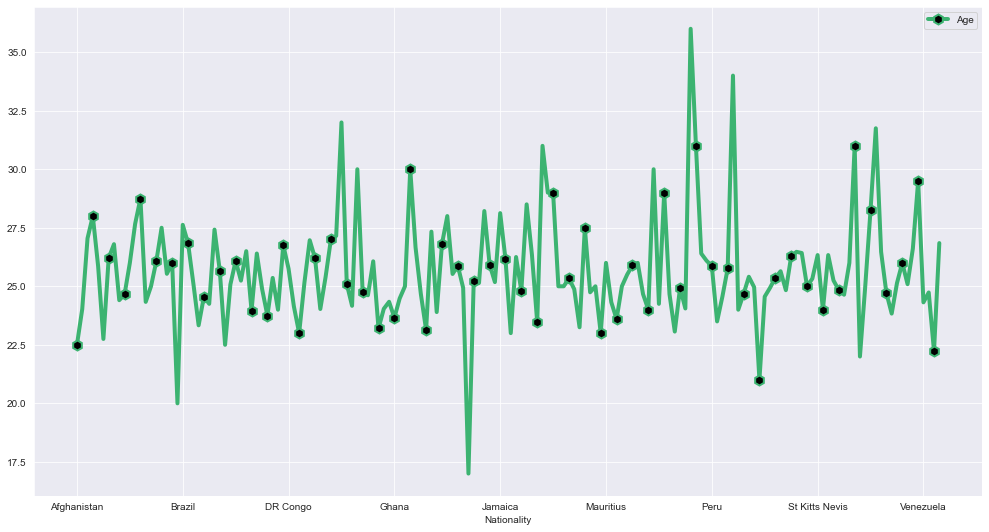

In [48]:
# Analisando a relação entre a nacionalidade e a idade dos jogadores
x = dados_fifa.pivot_table(index = 'Nationality',
                     values = 'Age').plot(kind='line', figsize =(17,9), color='mediumseagreen', linewidth=4,
         marker='h', markerfacecolor='k', markeredgewidth=2,
         markersize=10, markevery=3)
plt.show()

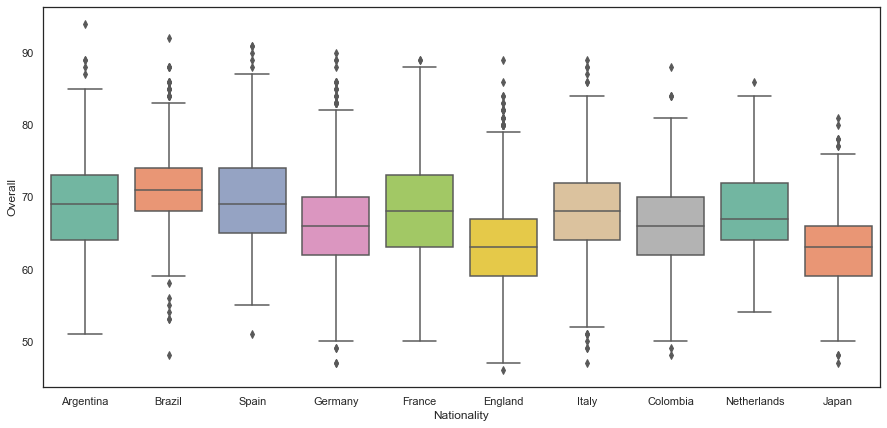

In [49]:
topN_paises = dados_fifa['Nationality'].value_counts().head(10).index.values # Definindo os 10 países mais populares
topN_paises_df = dados_fifa.loc[dados_fifa['Nationality'].isin(topN_paises), :]
sns.set(style="white") # Plotando um boxplot, para saber como difere de país para país
plt.figure(figsize=(15, 7))
p = sns.boxplot(x = 'Nationality', y = 'Overall', data = topN_paises_df, palette="Set2")

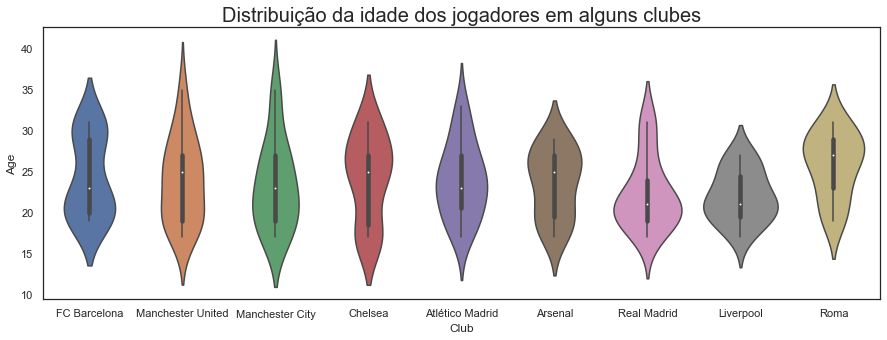

In [50]:
alguns_clubes = ('Atlético Madrid','Liverpool', 'Manchester City', 'Arsenal','Roma', 
                 'Real Madrid','FC Barcelona', 'Chelsea', 'Manchester United')
dados_club = dados_fifa.loc[dados_fifa['Club'].isin(alguns_clubes) & dados_fifa['Age']]

fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
ax = sns.violinplot(x="Club", y="Age", data=dados_club);
ax.set_title(label='Distribuição da idade dos jogadores em alguns clubes', fontsize=20);

**Podemos perceber, que a Espanha tem o maior potencial seguido de perto por Brasil, Argentina e França, um pouco diferente das pontuações gerais**

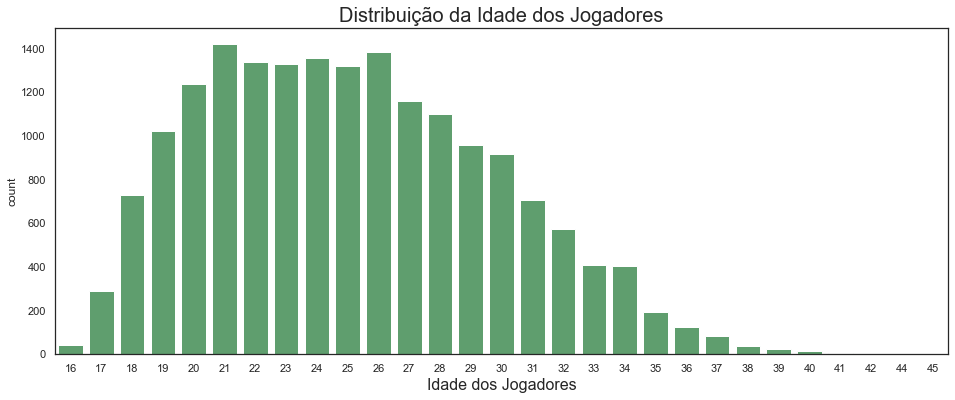

In [51]:
x = dados_fifa['Age']
plt.figure(figsize=(16,6))
ax = sns.countplot(x, color='g')
ax.set_xlabel(xlabel = 'Idade dos Jogadores', fontsize = 16)
ax.set_title(label = 'Distribuição da Idade dos Jogadores', fontsize = 20)
plt.show()

**Como podemos ver na distribuição da idade dos jogadores, a idade varia entre 16 a 45 anos, e aproximadamente 1.200 jogadores no dataset tem idade entre 21 a 26 anos**

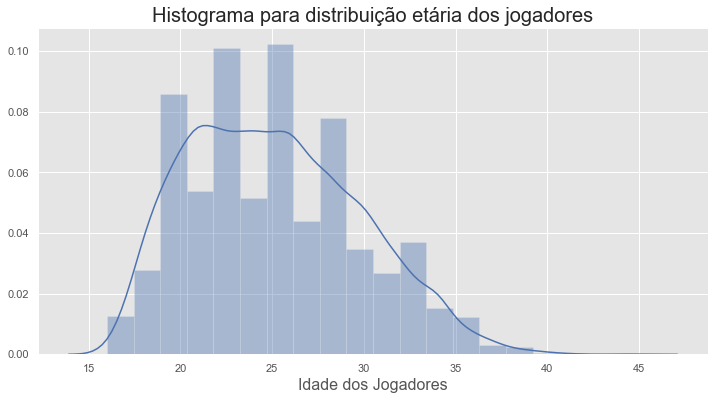

In [52]:
x = dados_fifa['Age']
plt.figure(figsize = (12, 6))
plt.style.use('ggplot')
ax = sns.distplot(x, bins = 20, kde = True, color='b')
ax.set_xlabel(xlabel = 'Idade dos Jogadores', fontsize = 16)
ax.set_title(label = 'Histograma para distribuição etária dos jogadores', fontsize = 20)
plt.show()

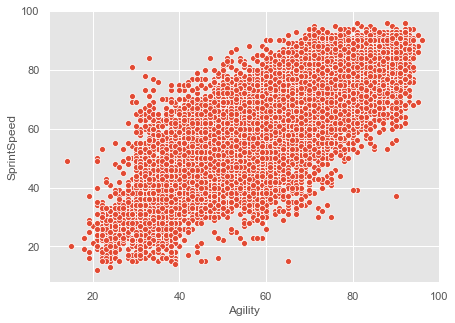

In [53]:
plt.figure(figsize=(7,5))

sns.scatterplot(x = dados_fifa['Agility'], y = dados_fifa['SprintSpeed'], data = dados_fifa);


**É possível identificar que as duas variáveis tiveram uma boa correlação, pois conforme a variável Agility aumenta, a variável SprintSpeed aumenta também, tornando assim uma correlação positiva.**

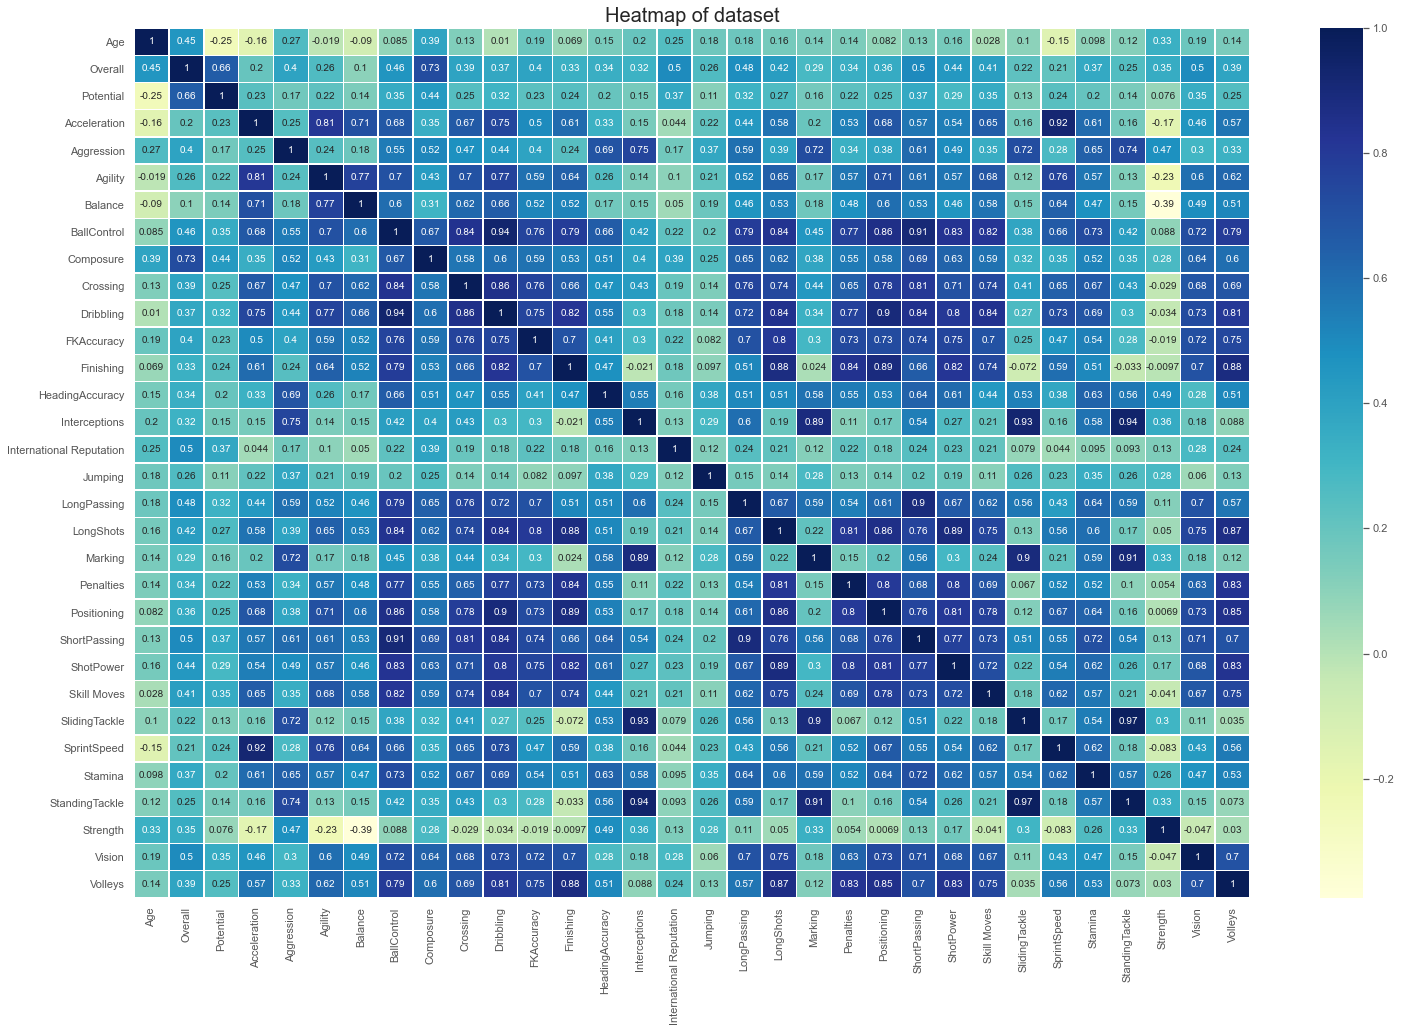

In [54]:
plt.rcParams['figure.figsize']=(25,16)
hm=sns.heatmap(df[['Age', 'Overall', 'Potential', 'Value', 'Wage',
                'Acceleration', 'Aggression', 'Agility', 'Balance', 'BallControl', 
                'Body Type','Composure', 'Crossing','Dribbling', 'FKAccuracy', 'Finishing', 
                'HeadingAccuracy', 'Interceptions','International Reputation',
                'Joined', 'Jumping', 'LongPassing', 'LongShots',
                'Marking', 'Penalties', 'Position', 'Positioning',
                'ShortPassing', 'ShotPower', 'Skill Moves', 'SlidingTackle',
                'SprintSpeed', 'Stamina', 'StandingTackle', 'Strength', 'Vision',
                'Volleys']].corr(), annot = True, linewidths=.5, cmap='YlGnBu')
hm.set_title(label='Heatmap of dataset', fontsize=20)
hm;

**Valores positivos mostram correlação positiva, enquanto valores negativos mostram correlação inversa. Como podemos ver, as variáveis 'Dribbling' e 'BallControl' tiveram uma correlação muito interessante de 0.94**

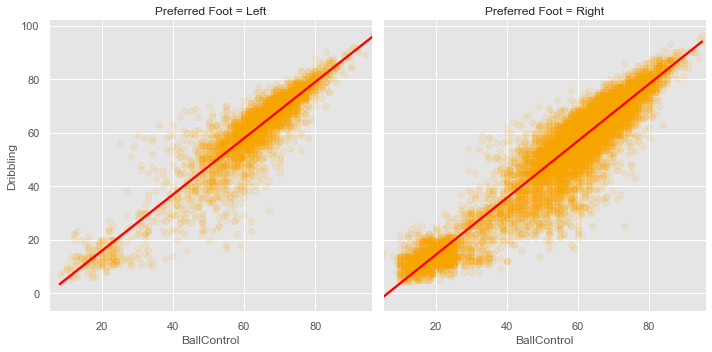

In [55]:
# Agora iremos analisar as duas variáveis que tiveram uma boa correlação
sns.lmplot(x = 'BallControl', y = 'Dribbling', 
           data = df,col = 'Preferred Foot',scatter_kws = {'alpha':0.1,'color':'orange'},
           line_kws={'color':'red'});

**Analisando as duas variáveis com uma linha de regressão** / Visualização inspirada no Kaggle: https://www.kaggle.com/nitindatta

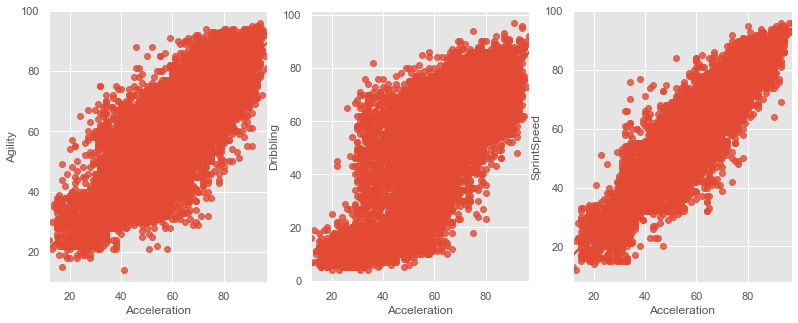

In [56]:
def scatter(dados_fifa):
    feats = ('Agility', 'Dribbling', 'SprintSpeed')
    
    for index, feat in enumerate(feats):
        plt.subplot(len(feats)/4+1, 4, index+1)
        ax = sns.regplot(x = 'Acceleration', y = feat, data = dados_fifa)

plt.figure(figsize = (18, 5))
plt.subplots_adjust(hspace = 0.4)

scatter(dados_fifa)

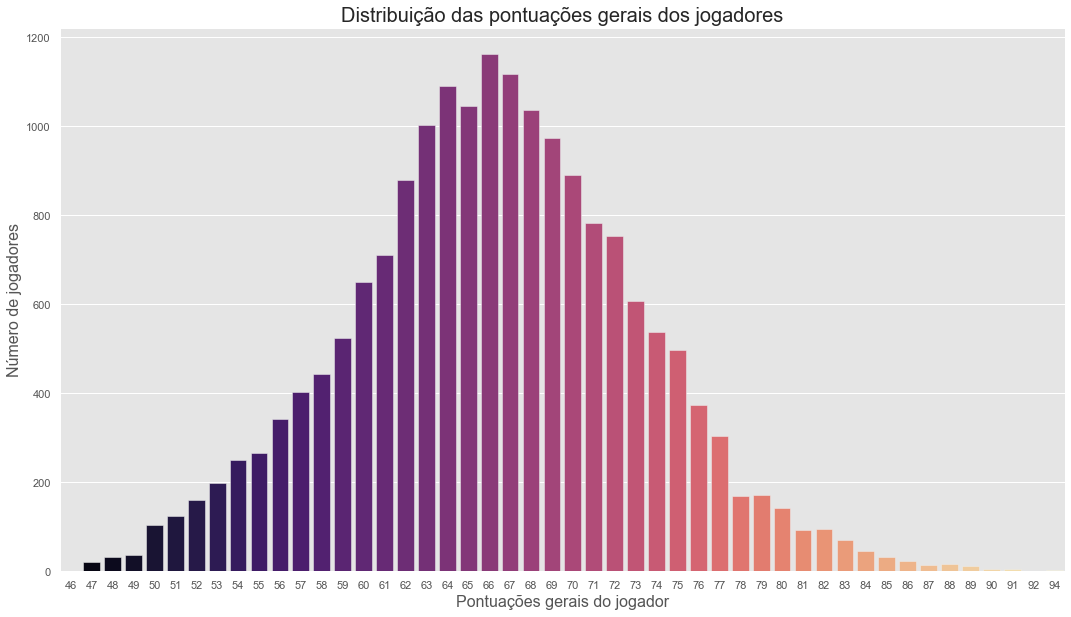

In [57]:
x = dados_fifa['Overall']
plt.figure(figsize=(18,10))
ax = sns.countplot(x, palette='magma')
ax.set_xlabel(xlabel = "Pontuações gerais do jogador", fontsize = 16)
ax.set_ylabel(ylabel = 'Número de jogadores', fontsize = 16)
ax.set_title(label = 'Distribuição das pontuações gerais dos jogadores', fontsize = 20)
plt.show()